AD 450 Final 
Subject: US Chronic Disease Indicators

CDC's Division of Population Health provides a cross-cutting set of 115 indicators developed by consensus among CDC, the Council of State and Territorial Epidemiologists, and the National Association of Chronic Disease Directors. 
These indicators allow states and territories to uniformly define, collect, and report chronic disease data that are important to public health practice in their area. 
In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.

EDA

Summarize the data

Get basic statistics on the data

Get value counts of a categorical column

Get histograms of numeric columns

Look for relationships and patterns in the data

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np 
import math
import matplotlib.pyplot as plt

Summarize the Data


In [ ]:
us_chronic_disease_indicators = pd.read_csv(r"final_data\U.S._Chronic_Disease_Indicators.csv")
print("Summarize the data: ")
print(us_chronic_disease_indicators.head())

""" print(us_chronic_disease_indicators.dtypes)"""

Summarize the data: 
YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DataValueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
Geolocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
ResponseID       

Get basic statistics on the data


In [45]:
print("Get basic statistics on the data: ")
print(us_chronic_disease_indicators.describe())

Get basic statistics on the data: 
           YearStart        YearEnd  Response     DataValue  DataValueAlt  \
count  309215.000000  309215.000000       0.0  2.091960e+05  2.091960e+05   
mean     2020.012195    2020.288540       NaN  6.943569e+02  7.356701e+02   
std         1.530835       1.068591       NaN  1.620341e+04  1.834715e+04   
min      2015.000000    2019.000000       NaN  0.000000e+00  0.000000e+00   
25%      2019.000000    2019.000000       NaN  1.240000e+01  1.240000e+01   
50%      2020.000000    2020.000000       NaN  2.700000e+01  2.700000e+01   
75%      2021.000000    2021.000000       NaN  5.780000e+01  5.780000e+01   
max      2022.000000    2022.000000       NaN  2.925456e+06  2.925456e+06   

       LowConfidenceLimit  HighConfidenceLimit  StratificationCategory2  \
count       188885.000000        188890.000000                      0.0   
mean            36.825051            46.030554                      NaN   
std             65.025590            69.995643

Get value counts of a categorical column


In [43]:
print("Get value counts of a categorical column: ")
print(us_chronic_disease_indicators["Topic"].value_counts())  # Frequency of health topics

Get value counts of a categorical column: 
Topic
Cardiovascular Disease                             30709
Chronic Obstructive Pulmonary Disease              26951
Nutrition, Physical Activity, and Weight Status    26069
Health Status                                      25612
Alcohol                                            25321
Cancer                                             22358
Immunization                                       19140
Social Determinants of Health                      19026
Arthritis                                          18645
Diabetes                                           17318
Mental Health                                      16976
Tobacco                                            15931
Oral Health                                        13236
Asthma                                             10511
Cognitive Health and Caregiving                     9904
Sleep                                               5318
Disability                             

Get histograms of numeric columns


Get histograms for numeric columns: 


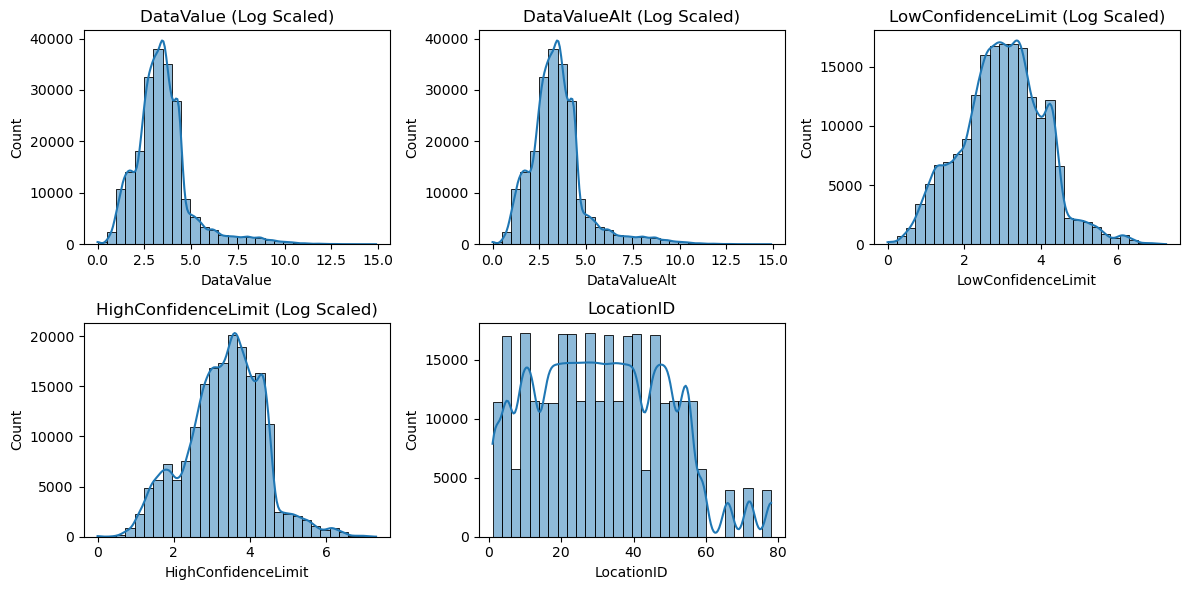

In [ ]:
print("Get histograms for numeric columns: ")

# Select numeric columns
numeric_cols = us_chronic_disease_indicators.select_dtypes(include=["int64", "float64"]).columns

# Drop columns with too few unique values
filtered_cols = [col for col in numeric_cols if us_chronic_disease_indicators[col].nunique() > 10]  

num_cols = len(filtered_cols)
num_rows = math.ceil(num_cols / 3)  
plt.figure(figsize=(12, num_rows * 3))  

for i, col in enumerate(filtered_cols, 1):
    plt.subplot(num_rows, 3, i)  

    # Use a log-scale for very large sets
    if us_chronic_disease_indicators[col].max() > 1000:  
        transformed_data = np.log1p(us_chronic_disease_indicators[col].dropna())
        sns.histplot(transformed_data, bins=30, kde=True)
        plt.title(f"{col} (Log Scaled)")
    else:
        sns.histplot(us_chronic_disease_indicators[col].dropna(), bins=30, kde=True)
        plt.title(col)

plt.tight_layout()
plt.show()

Look for relationships and patterns in the data:

For such a complex dataset, it's neccesary to do some data cleaning in order to make this information easier to interpret. 

Some fields are missing large amounts of data, making them not particularly useful. For example, Response and ResponseID are completely empty. These missing values need to be dropped. 

DataValueUnit consists of numerical data recorded across multiple measurement types:

Percentages

Raw counts

Rates per 100,000

Rates per 1000

This data needs to be separated across these categories to be considered useful. 

Additionally, this data has been collected from 55 locations, across 19 disease categories. 

Effectively cleaning the data to make it useful means removing empty data, and breaking down DataValueUnit by numerical type. 

In [47]:
# Drop rows where DataValue is missing
filtered_data = us_chronic_disease_indicators.dropna(subset=["DataValue"])

# Separate data by DataValueUnit
percent_data = filtered_data[filtered_data["DataValueUnit"] == "%"]
count_data = filtered_data[filtered_data["DataValueUnit"] == "Number"]
rate_per_100k_data = filtered_data[filtered_data["DataValueUnit"] == "cases per 100,000"]
rate_per_1k_data = filtered_data[filtered_data["DataValueUnit"] == "cases per 1,000"]

# Print the number of rows in each category
print(f"Total rows after filtering: {filtered_data.shape[0]}")
print(f"Percentage-based rows: {percent_data.shape[0]}")
print(f"Raw count rows: {count_data.shape[0]}")
print(f"Rate per 100,000 rows: {rate_per_100k_data.shape[0]}")
print(f"Rate per 1,000 rows: {rate_per_1k_data.shape[0]}")


Total rows after filtering: 209196
Percentage-based rows: 135432
Raw count rows: 37236
Rate per 100,000 rows: 20410
Rate per 1,000 rows: 6258
